<a href="https://colab.research.google.com/github/AnkushSaini22/Bank-Customer-Attrition-Insights/blob/main/Bank_Customer_Attrition_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [173]:
df1=pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')


In [174]:
df = df1.copy()

In [175]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15741032,Tsao,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15750014,Chikere,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15784761,Ballard,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15768359,Akhtar,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15805769,O'Loughlin,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [177]:
df.duplicated().sum()

0

In [178]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [179]:
df.drop('RowNumber',axis=1,inplace=True)

In [180]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [181]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [182]:
columns = [ 'Geography',
           'Gender', 'Tenure',  'NumOfProducts', 'HasCrCard',
           'IsActiveMember',  'Complain', 'Satisfaction Score',
           'Card Type']

grouped_results = {}
for col in columns:
    grouped_results[col] = df.groupby(col)['Exited'].sum()

for col, data in grouped_results.items():
    print(f"Grouped by {col}:\n{data}\n")


Grouped by Geography:
Geography
France     811
Germany    814
Spain      413
Name: Exited, dtype: int64

Grouped by Gender:
Gender
Female    1139
Male       899
Name: Exited, dtype: int64

Grouped by Tenure:
Tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     214
10    101
Name: Exited, dtype: int64

Grouped by NumOfProducts:
NumOfProducts
1    1409
2     349
3     220
4      60
Name: Exited, dtype: int64

Grouped by HasCrCard:
HasCrCard
0     613
1    1425
Name: Exited, dtype: int64

Grouped by IsActiveMember:
IsActiveMember
0    1303
1     735
Name: Exited, dtype: int64

Grouped by Complain:
Complain
0       4
1    2034
Name: Exited, dtype: int64

Grouped by Satisfaction Score:
Satisfaction Score
1    387
2    439
3    401
4    414
5    397
Name: Exited, dtype: int64

Grouped by Card Type:
Card Type
DIAMOND     546
GOLD        482
PLATINUM    508
SILVER      502
Name: Exited, dtype: int64



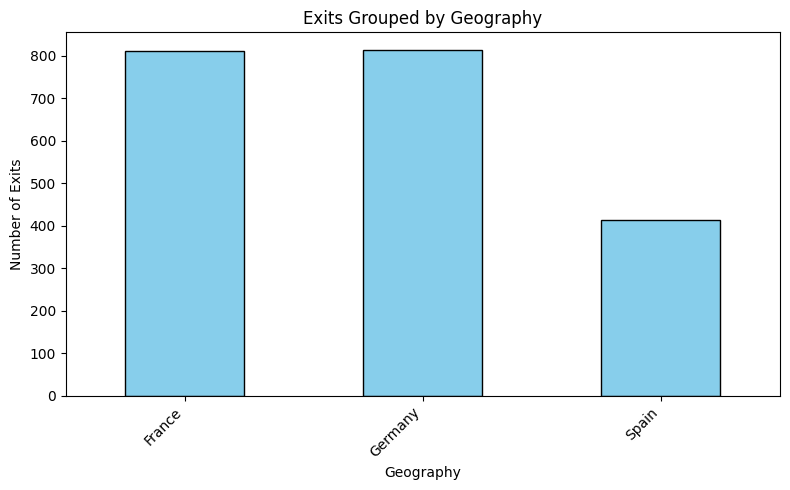

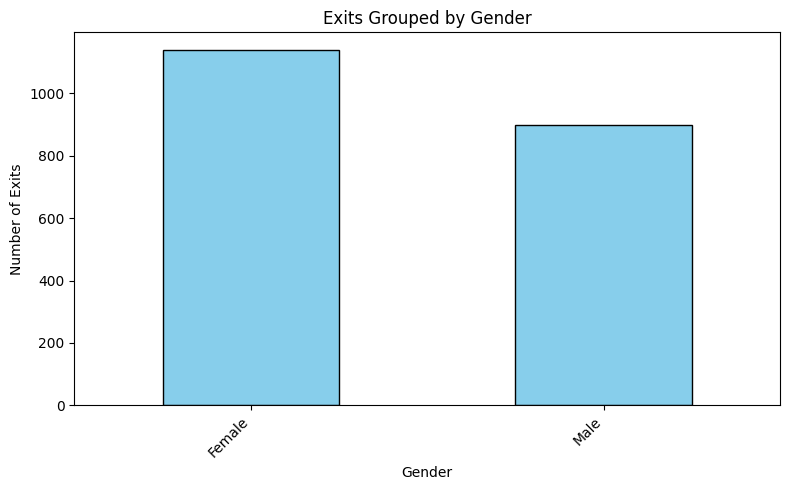

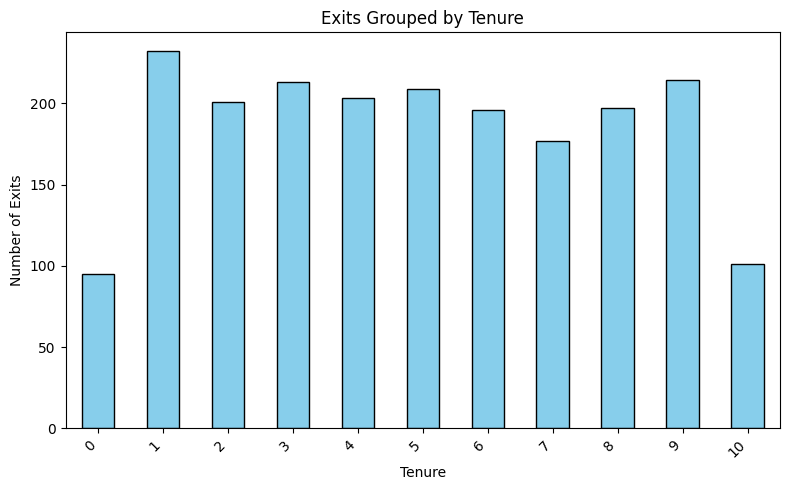

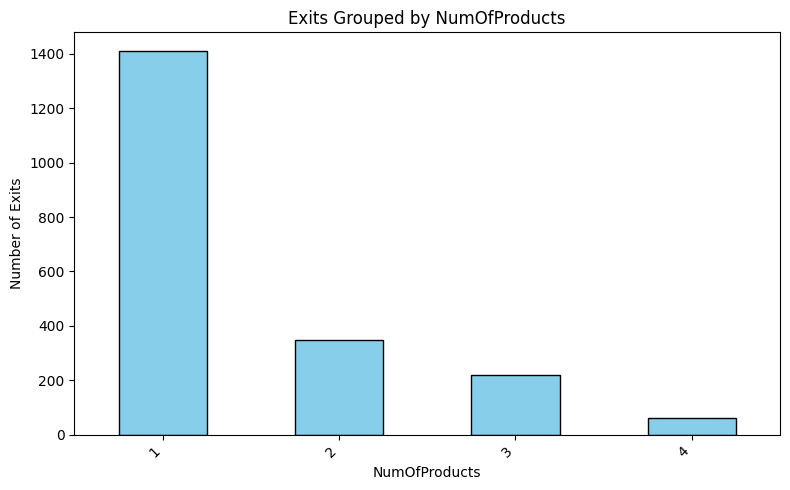

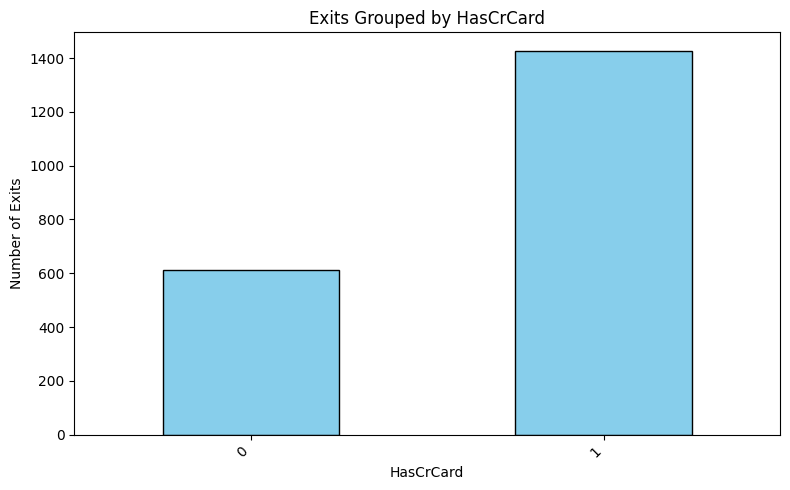

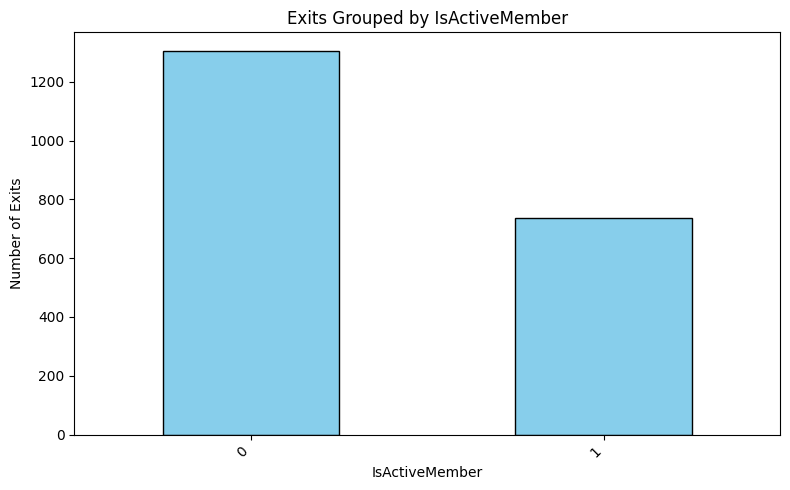

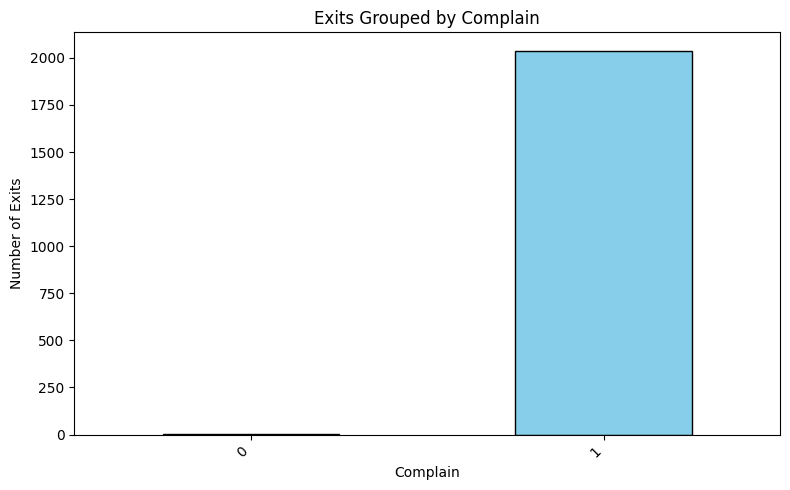

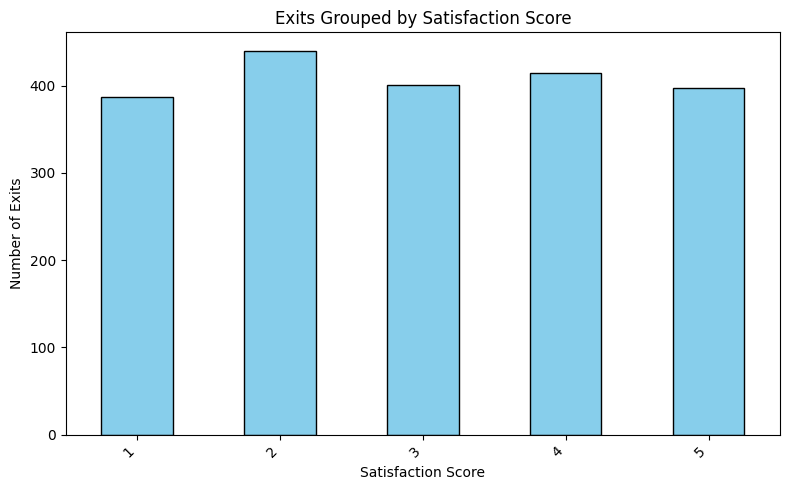

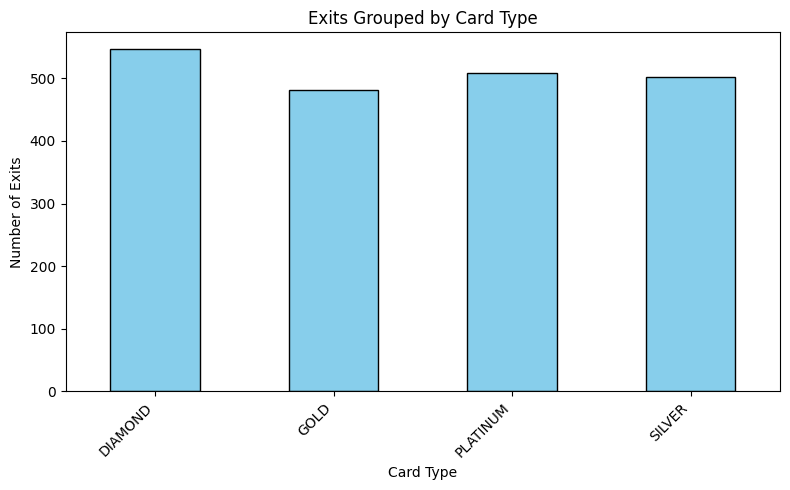

In [183]:
for col, data in grouped_results.items():
    plt.figure(figsize=(8, 5))
    data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Exits Grouped by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Exits')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [184]:
df2 = pd.get_dummies(df, columns=['Card Type', 'Geography', 'Gender'])
columns_to_convert = [
    'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_SILVER',
    'Geography_France', 'Geography_Spain', 'Geography_Germany',
    'Gender_Female', 'Gender_Male'
]


df2[columns_to_convert] = df2[columns_to_convert].astype(int)
df2.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15598695,Fields,619,42,2,0.00,1,1,1,101348.88,...,464,1,0,False,0,1,0,0,1,0
1,15649354,Johnston,608,41,1,83807.86,1,0,1,112542.58,...,456,1,0,False,0,0,0,1,1,0
2,15737556,Vasilyev,502,42,8,159660.80,3,1,0,113931.57,...,377,1,0,False,0,1,0,0,1,0
3,15671610,Hooper,699,39,1,0.00,2,0,0,93826.63,...,350,0,1,False,0,1,0,0,1,0
4,15625092,Colombo,850,43,2,125510.82,1,1,1,79084.10,...,425,0,1,False,0,0,0,1,1,0


In [185]:
df2.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [186]:
df2.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,...,3.013800,606.515100,0.250700,0.25020,0.249600,0.501400,0.250900,0.247700,0.454300,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,...,1.405919,225.924839,0.433438,0.43315,0.432803,0.500023,0.433553,0.431698,0.497932,0.497932
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,...,1.000000,119.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,...,2.000000,410.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,...,3.000000,605.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,...,4.000000,801.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,...,5.000000,1000.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
columns = [ 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']

grouped_results = {}
for col in columns:
    grouped_results[col] = df2.groupby(col)['Exited'].sum()

for col, data in grouped_results.items():
    print(f"Grouped by {col}:\n{data}\n")

Grouped by Card Type_DIAMOND:
Card Type_DIAMOND
0    1492
1     546
Name: Exited, dtype: int64

Grouped by Card Type_GOLD:
Card Type_GOLD
0    1556
1     482
Name: Exited, dtype: int64

Grouped by Card Type_PLATINUM:
Card Type_PLATINUM
False    1530
True      508
Name: Exited, dtype: int64

Grouped by Card Type_SILVER:
Card Type_SILVER
0    1536
1     502
Name: Exited, dtype: int64

Grouped by Geography_France:
Geography_France
0    1227
1     811
Name: Exited, dtype: int64

Grouped by Geography_Germany:
Geography_Germany
0    1224
1     814
Name: Exited, dtype: int64

Grouped by Geography_Spain:
Geography_Spain
0    1625
1     413
Name: Exited, dtype: int64

Grouped by Gender_Female:
Gender_Female
0     899
1    1139
Name: Exited, dtype: int64

Grouped by Gender_Male:
Gender_Male
0    1139
1     899
Name: Exited, dtype: int64



In [188]:
df2.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

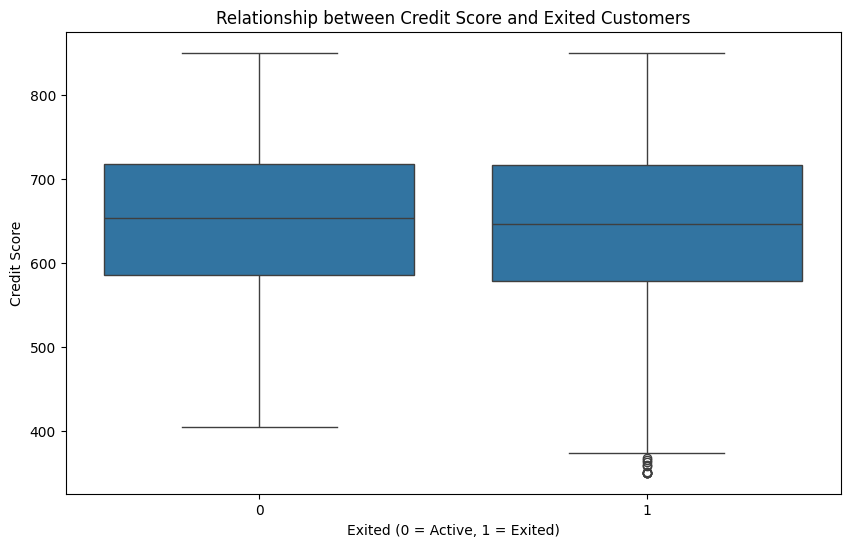

In [189]:
plt.figure(figsize=(10, 6))


sns.boxplot(x='Exited', y='CreditScore', data=df)


plt.title('Relationship between Credit Score and Exited Customers')
plt.xlabel('Exited (0 = Active, 1 = Exited)')
plt.ylabel('Credit Score')

plt.show()

In [190]:
avg_balance = df.groupby('Exited')['Balance'].mean().reset_index()

fig = px.bar(avg_balance, x='Exited', y='Balance',
             labels={'Exited': 'Exited (1: Yes, 0: No)', 'Balance': 'Average Balance'},
             title="Average Balance for Customers Who Exited vs Stayed Active")

fig.show()

In [191]:
fig = px.histogram(df, x="HasCrCard", color="Exited", barmode="group",
                   labels={'HasCrCard': 'Credit Card Holder (1: Yes, 0: No)', 'Exited': 'Exited (1: Yes, 0: No)'},
                   title="Analysis of Credit Card Holders: Active vs Exited")

fig.show()

In [192]:

fig = px.box(
    df2,
    x='Card Type_DIAMOND',
    y='Balance',
    title="Balance Distribution for Upgraded and Non-Upgraded Customers",
    labels={'Card Type_DIAMOND': 'Card Upgrade Status', 'Balance': 'Account Balance'}
)
fig.show()


In [193]:
print(df2.columns)


Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [194]:
import plotly.graph_objects as go


columns_for_legend = ['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain',
                      'Satisfaction Score', 'Card Type']


geography_countries = ['France', 'Spain', 'Germany']


grouped_results = {}
for col in columns_for_legend:
    grouped_results[col] = df[df['Geography'].isin(geography_countries)].groupby(['Geography', col])['Exited'].sum().reset_index()

for col in columns_for_legend:
    fig = go.Figure()


    for category in grouped_results[col][col].unique():
        category_data = grouped_results[col][grouped_results[col][col] == category]
        fig.add_trace(go.Bar(
            x=category_data['Geography'],  # Geography as x-axis
            y=category_data['Exited'],  # Sum of exits
            name=f'{col} - {category}',  # Legend label based on column and category
            hoverinfo='text',
            text=category_data['Exited'],
        ))

    fig.update_layout(
        title=f'Number of Exits by {col} and Geography',
        xaxis_title='Geography',
        yaxis_title='Number of Exits',
        barmode='group',
        xaxis_tickangle=-45,
        template='plotly_white',
        legend_title=f'{col} Legend'
    )

    fig.show()


In [195]:
import plotly.express as px

# Create a histogram for 'EstimatedSalary'
fig = px.histogram(
    df,
    x='EstimatedSalary',  # Column for the histogram
    nbins=20,             # Number of bins (adjust as needed)
    title="Distribution of Estimated Salary",
    labels={'EstimatedSalary': 'Estimated Salary'},
    template='plotly_white'
)


fig.update_layout(
    xaxis_title="Estimated Salary Range",
    yaxis_title="Count of People",
    bargap=0.2,  # Gap between bars
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()


In [196]:


# Histogram for Distribution of Balance
fig = px.histogram(
    df,
    x='Balance',
    nbins=20,
    title="Distribution of Balance",
    labels={'Balance': 'Account Balance'},
    template='plotly_white'
)

# Customize layout for Balance distribution
fig.update_layout(
    xaxis_title="Balance Range",
    yaxis_title="Count of People",
    bargap=0.2,
    title_x=0.5
)

fig.show()

# Average Balance by Age
avg_balance = df.groupby('Age')['Balance'].mean().reset_index()

# Bar chart for Average Balance by Age
fig = px.bar(avg_balance, x='Age', y='Balance',
             labels={'Age': 'Customer Age', 'Balance': 'Average Balance'},
             title="Average Balance for Different Age Groups")

fig.show()


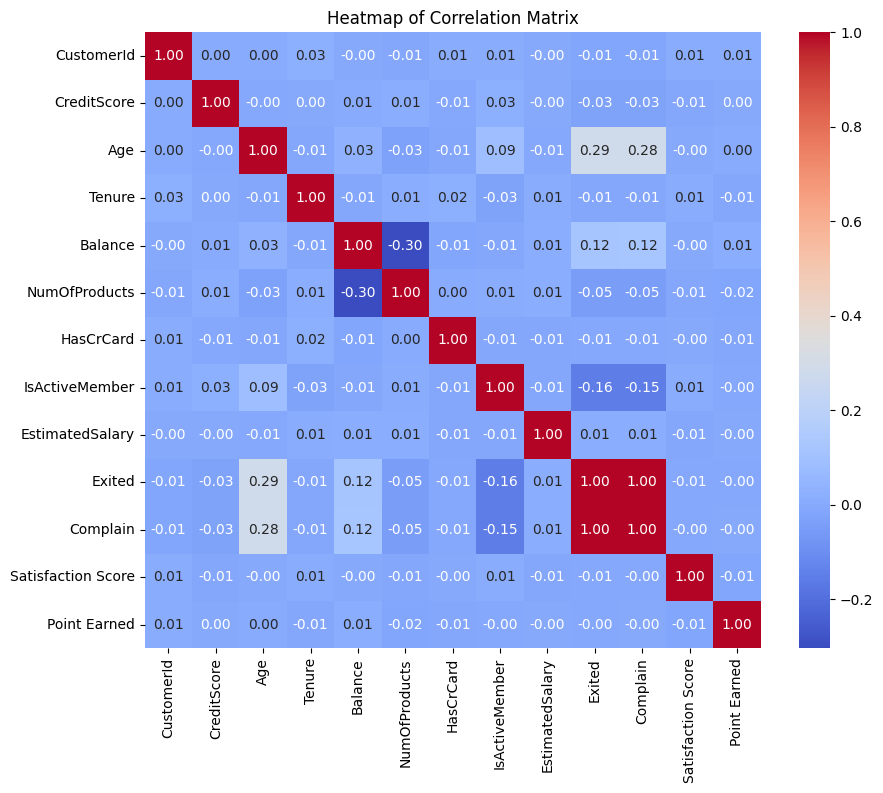

In [197]:
num_val = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_val.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

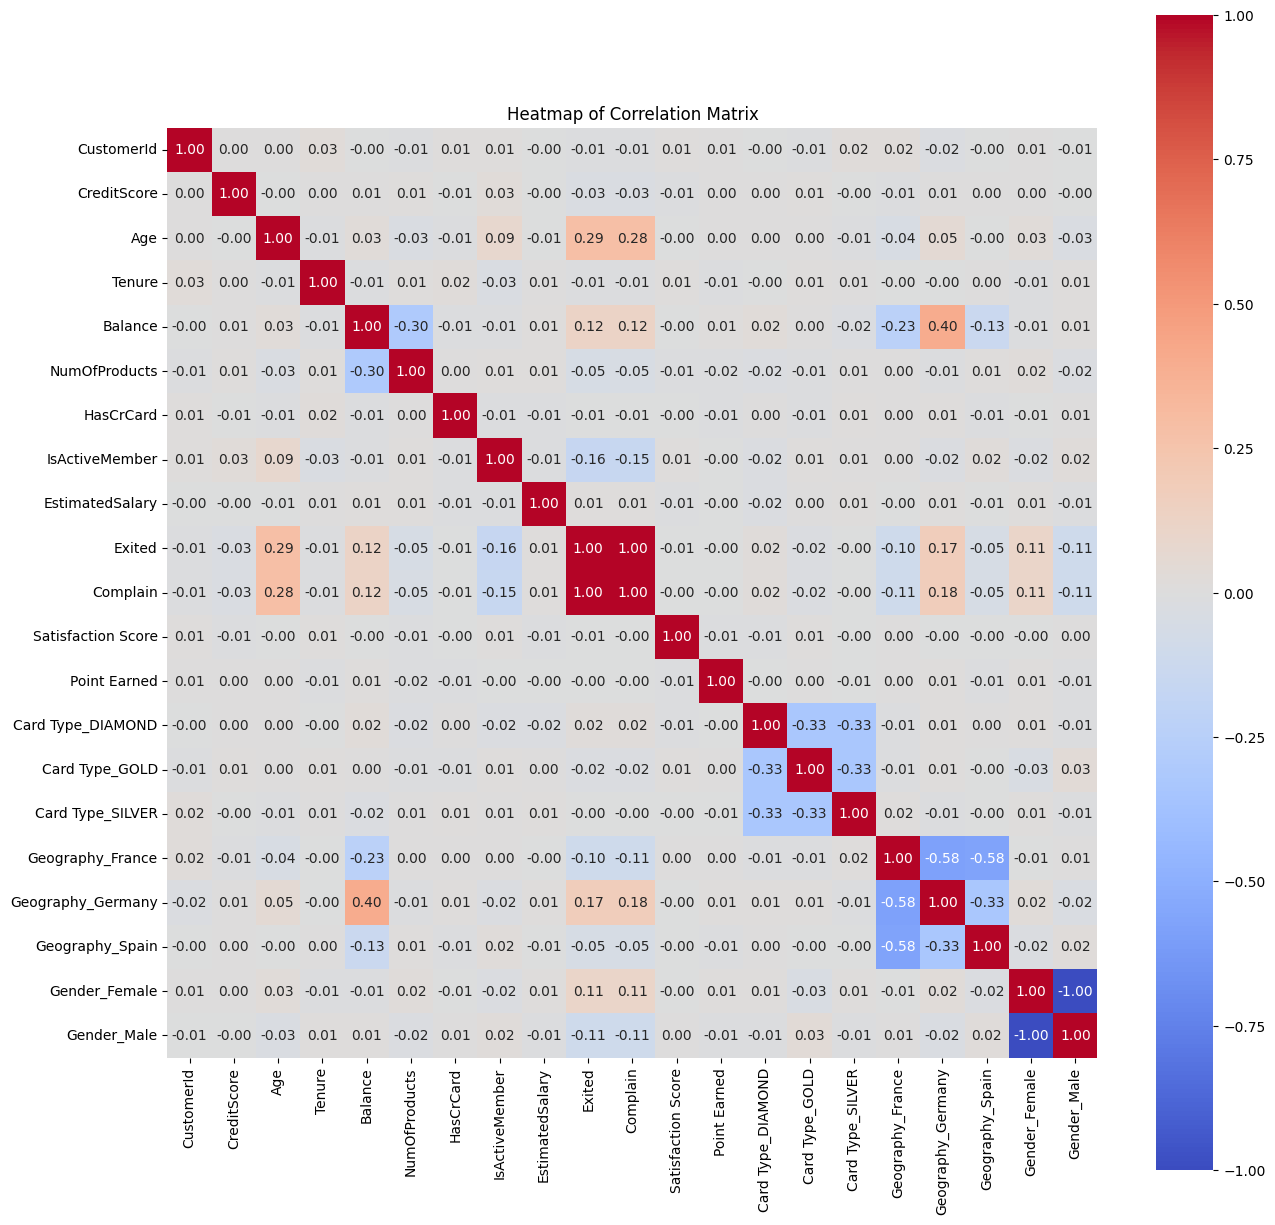

In [198]:
num_val = df2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_val.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [199]:
# Filter data for customers who have a credit card
filtered_df = df[df['HasCrCard'] == 1]

# Group by 'Exited' and calculate required metrics
result = filtered_df.groupby('Exited').agg(
    Number_of_Customers=('Exited', 'count'),
    Sum_of_Credit_Score=('CreditScore', 'sum')
).reset_index()

# Rename 'Exited' for better readability
result['Exited'] = result['Exited'].replace({0: 'Non-Exited', 1: 'Exited'})

print(result)


       Exited  Number_of_Customers  Sum_of_Credit_Score
0  Non-Exited                 5630              3668476
1      Exited                 1425               918600


In [200]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


1. What is the total credit score for exited vs. non-exited customers with a credit card?



In [201]:
result = df[df['HasCrCard'] == 1].groupby('Exited')['CreditScore'].sum().reset_index()
result.columns = ['Exited', 'Total Credit Score']
print(result)


   Exited  Total Credit Score
0       0             3668476
1       1              918600


What is the average balance for customers segmented by their tenure and whether they exited or not?


In [202]:
result = df.groupby(['Tenure', 'Exited'])['Balance'].mean().reset_index()
result.columns = ['Tenure', 'Exited', 'Average Balance']
print(result)


    Tenure  Exited  Average Balance
0        0       0     75046.463270
1        0       1     96054.892316
2        1       0     75293.938095
3        1       1     89843.924052
4        2       0     75055.653211
5        2       1     84357.165522
6        3       0     74327.391508
7        3       1     90152.435587
8        4       0     70464.682646
9        4       1     87977.833350
10       5       0     72279.339963
11       5       1     92446.422201
12       6       0     70886.770674
13       6       1     88239.348673
14       7       0     72066.065958
15       7       1     92309.932542
16       8       0     73149.422585
17       8       1     98057.316294
18       9       0     70844.356182
19       9       1     97137.332009
20      10       0     70925.147121
21      10       1     85491.036931


How does the number of exited vs. non-exited customers vary based on geography and credit score range?

In [203]:
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=[0, 400, 600, 800, 1000], labels=['Low', 'Medium', 'High', 'Very High'])
result = df.groupby(['Geography', 'CreditScoreRange', 'Exited']).size().reset_index(name='Count')
print(result)


   Geography CreditScoreRange  Exited  Count
0     France              Low       0      0
1     France              Low       1      6
2     France           Medium       0   1283
3     France           Medium       1    262
4     France             High       0   2652
5     France             High       1    494
6     France        Very High       0    268
7     France        Very High       1     49
8    Germany              Low       0      0
9    Germany              Low       1      6
10   Germany           Medium       0    501
11   Germany           Medium       1    261
12   Germany             High       0   1071
13   Germany             High       1    495
14   Germany        Very High       0    123
15   Germany        Very High       1     52
16     Spain              Low       0      0
17     Spain              Low       1      7
18     Spain           Medium       0    617
19     Spain           Medium       1    123
20     Spain             High       0   1320
21     Spa

<ipython-input-203-425f61e9656a>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



What is the distribution of the number of products held by customers segmented by balance and exit status?

In [204]:
result = df.groupby(['NumOfProducts', 'Exited'])['Balance'].describe().reset_index()
print(result)


   NumOfProducts  Exited   count           mean           std  min        25%  \
0              1       0  3675.0  101052.817176  51043.453639  0.0  83322.525   
1              1       1  1409.0   92028.819787  58077.936738  0.0  45472.280   
2              2       0  4241.0   48720.688875  61929.704331  0.0      0.000   
3              2       1   349.0   90260.280115  58494.165130  0.0  33563.950   
4              3       0    46.0   25744.263913  51690.198017  0.0      0.000   
5              3       1   220.0   85853.087091  60120.714576  0.0      0.000   
6              4       1    60.0   93733.135000  57507.383750  0.0  65787.320   

          50%          75%        max  
0  112689.950  135493.3300  221532.80  
1  110022.740  132217.4500  238387.56  
2       0.000  110046.9300  214346.96  
3  108960.000  129022.0600  210433.08  
4       0.000       0.0000  161591.11  
5  106655.515  131537.6400  250898.09  
6  116808.195  131589.5125  195238.29  


What is the average tenure of customers who have exited or stayed, segmented by gender and geography?

In [205]:
result = df.groupby(['Gender', 'Geography', 'Exited'])['Tenure'].mean().reset_index()
result.columns = ['Gender', 'Geography', 'Exited', 'Average Tenure']
print(result)


    Gender Geography  Exited  Average Tenure
0   Female    France       0        4.957246
1   Female    France       1        4.921739
2   Female   Germany       0        4.899329
3   Female   Germany       1        5.075893
4   Female     Spain       0        5.086247
5   Female     Spain       1        4.679654
6     Male    France       0        5.039967
7     Male    France       1        5.113960
8     Male   Germany       0        5.100000
9     Male   Germany       1        4.920765
10    Male     Spain       0        5.122720
11    Male     Spain       1        4.626374


 How many exited vs. non-exited customers are there, and what is their total balance, grouped by their credit card status?

In [206]:
result = df.groupby(['Exited', 'HasCrCard'])['Balance'].sum().reset_index()
result.columns = ['Exited', 'HasCrCard', 'Total Balance']
print(result)


   Exited  HasCrCard  Total Balance
0       0          0   1.731239e+08
1       0          1   4.060539e+08
2       1          0   5.635280e+07
3       1          1   1.293283e+08


What is the churn rate among customers with different card types, segmented by their tenure and geography?

In [207]:
result = df.groupby(['Card Type', 'Tenure', 'Geography', 'Exited']).size().reset_index(name='Count')
print(result)


    Card Type  Tenure Geography  Exited  Count
0     DIAMOND       0    France       0     38
1     DIAMOND       0    France       1      9
2     DIAMOND       0   Germany       0     23
3     DIAMOND       0   Germany       1      6
4     DIAMOND       0     Spain       0     14
..        ...     ...       ...     ...    ...
259    SILVER      10    France       1     13
260    SILVER      10   Germany       0     26
261    SILVER      10   Germany       1     10
262    SILVER      10     Spain       0     23
263    SILVER      10     Spain       1      5

[264 rows x 5 columns]


In [208]:
result['Count'].max()

127

In [209]:
result[result['Count']== 127]

,Card Type,Tenure,Geography,Exited,Count
42,DIAMOND,7,France,0,127


How does the tenure compare for customers with a high credit score and multiple products vs. those with fewer products?

In [210]:
df['HighCreditScore'] = df['CreditScore'] > 700
result = df.groupby(['HighCreditScore', 'NumOfProducts'])['Tenure'].mean().reset_index()
print(result)


   HighCreditScore  NumOfProducts    Tenure
0            False              1  4.953759
1            False              2  5.044409
2            False              3  5.102703
3            False              4  5.545455
4             True              1  5.021809
5             True              2  5.067808
6             True              3  4.777778
7             True              4  4.625000


What is the churn rate of customers based on gender, credit score, and number of products?

In [211]:
result = df.groupby(['Gender',  'NumOfProducts', 'Exited']).size().reset_index(name='Count')
print(result)


    Gender  NumOfProducts  Exited  Count
0   Female              1       0   1534
1   Female              1       1    762
2   Female              2       0   1850
3   Female              2       1    210
4   Female              3       0     20
5   Female              3       1    129
6   Female              4       1     38
7     Male              1       0   2141
8     Male              1       1    647
9     Male              2       0   2391
10    Male              2       1    139
11    Male              3       0     26
12    Male              3       1     91
13    Male              4       1     22


How does the average balance differ for customers with different credit card statuses and product holdings?

In [212]:
result = df.groupby(['HasCrCard', 'NumOfProducts'])['Balance'].mean().reset_index()
print(result)


   HasCrCard  NumOfProducts        Balance
0          0              1  100587.851076
1          0              2   52696.614100
2          0              3   70767.463289
3          0              4   94149.424211
4          1              1   97694.915170
5          1              2   51540.674655
6          1              3   77334.674158
7          1              4   93540.220488


What is the relationship between tenure, balance, and exit status for customers segmented by their gender?

In [213]:
result = df.groupby(['Gender', 'Exited'])[['Tenure', 'Balance']].mean().reset_index()
print(result)


   Gender  Exited    Tenure       Balance
0  Female       0  4.977086  71183.249639
1  Female       1  4.933275  89036.639359
2    Male       0  5.074375  73907.415316
3    Male       1  4.936596  93735.683949


What is the average credit score of customers who exited vs. stayed, segmented by the number of products and geography?

In [214]:
result = df.groupby(['Geography', 'NumOfProducts', 'Exited'])['CreditScore'].mean().reset_index()
result.columns = ['Geography', 'NumOfProducts', 'Exited', 'Average Credit Score']
print(result)


   Geography  NumOfProducts  Exited  Average Credit Score
0     France              1       0            649.438974
1     France              1       1            642.978723
2     France              2       0            652.357687
3     France              2       1            637.750000
4     France              3       0            677.090909
5     France              3       1            634.634146
6     France              4       1            665.896552
7    Germany              1       0            653.072633
8    Germany              1       1            649.174740
9    Germany              2       0            653.166302
10   Germany              2       1            639.769841
11   Germany              3       0            676.500000
12   Germany              3       1            651.069767
13   Germany              4       1            641.375000
14     Spain              1       0            650.306080
15     Spain              1       1            644.011236
16     Spain  

How does the distribution of balances vary for exited vs. non-exited customers who have a credit card?

In [215]:
result = df[df['HasCrCard'] == 1].groupby('Exited')['Balance'].describe().reset_index()
print(result)


   Exited   count          mean           std  min       25%         50%  \
0       0  5630.0  72123.243625  63138.099684  0.0      0.00   91271.825   
1       1  1425.0  90756.710126  57987.995016  0.0  36566.96  109799.550   

           75%       max  
0  126439.8275  221532.8  
1  131834.8000  213146.2  


How does tenure influence the likelihood of exiting, segmented by card type and number of products?

In [216]:
result = df.groupby(['Card Type', 'NumOfProducts', 'Exited'])['Tenure'].mean().reset_index()
print(result)


   Card Type  NumOfProducts  Exited    Tenure
0    DIAMOND              1       0  5.088328
1    DIAMOND              1       1  4.656000
2    DIAMOND              2       0  5.026078
3    DIAMOND              2       1  5.336735
4    DIAMOND              3       0  5.230769
5    DIAMOND              3       1  4.810345
6    DIAMOND              4       1  6.133333
7       GOLD              1       0  5.036842
8       GOLD              1       1  5.227811
9       GOLD              2       0  5.049812
10      GOLD              2       1  4.974026
11      GOLD              3       0  4.666667
12      GOLD              3       1  5.163265
13      GOLD              4       1  5.944444
14  PLATINUM              1       0  4.758119
15  PLATINUM              1       1  4.928571
16  PLATINUM              2       0  5.084337
17  PLATINUM              2       1  4.425532
18  PLATINUM              3       0  4.866667
19  PLATINUM              3       1  5.370968
20  PLATINUM              4       

What is the total balance and average credit score for customers segmented by tenure, geography, and exit status?

In [217]:
result = df.groupby(['Tenure', 'Geography', 'Exited']).agg(
    total_balance=('Balance', 'sum'),
    average_credit_score=('CreditScore', 'mean')
).reset_index()
print(result)


    Tenure Geography  Exited  total_balance  average_credit_score
0        0    France       0    10672786.24            650.558824
1        0    France       1     2777288.45            646.857143
2        0   Germany       0     8349285.08            664.608696
3        0   Germany       1     4330976.48            635.888889
4        0     Spain       0     4842704.00            654.974684
..     ...       ...     ...            ...                   ...
61      10    France       1     2791539.42            651.625000
62      10   Germany       0     9676105.97            658.127907
63      10   Germany       1     5061046.67            661.809524
64      10     Spain       0     6073242.97            664.212963
65      10     Spain       1      782008.64            638.454545

[66 rows x 5 columns]


In [218]:
# Dataset Link - https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights